# Descripción de las Tablas y Columnas

## **1. MONGO01_Bioquimicos**
- **paciente_id**: Identificador único del paciente.
- **glucosa, colesterol, trigliceridos**: Niveles bioquímicos en sangre.
- **hemoglobina, leucocitos, plaquetas, creatinina**: Indicadores de salud sanguínea.

## **2. MONGO02_Clinicos**
- **paciente_id**: Identificador único del paciente.
- **diabetes, hipertension, obesidad, cancer**: Enfermedades crónicas.
- **enfermedad_cardiaca, asma, epoc**: Condiciones clínicas específicas.

## **3. MONGO03_Geneticos**
- **paciente_id**: Identificador único del paciente.
- **mut_BRCA1, mut_TP53, mut_EGFR, mut_KRAS**: Mutaciones genéticas relevantes.
- **mut_PIK3CA, mut_ALK, mut_BRAF**: Mutaciones adicionales.

## **4. MONGO04_Economicos**
- **paciente_id**: Identificador único del paciente.
- **ingresos_mensuales, gastos_salud**: Información financiera.
- **seguro_salud, deudas, tipo_empleo, ayudas_publicas**: Datos socioeconómicos.

## **5. MONGO05_Generales**
- **paciente_id**: Identificador único del paciente.
- **fumador, alcohol, actividad_fisica, vive**: Hábitos y estilo de vida.

## **6. MONGO06_Sociodemograficos**
- **paciente_id**: Identificador único del paciente.
- **edad, sexo, estado_civil**: Datos personales.
- **nivel_educativo, ocupacion, region, pais_nacimiento, codigo_postal**: Información demográfica.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en la salida
# Ruta del archivo
ruta_archivo = r"..\csv\raw\Csv_Todas_Columnas.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas para comprobar
df.head()


,paciente_id,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
0,P1000000,"108,81","226,16","161,07","13,24","6,12","258,09","0,97",1,1,1,0,1,0,0,0,0,0,0,0,0,1,"2699,72",450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
1,P1000001,"74,23","148,89","110,77","13,68","6,97","278,32","0,85",0,0,0,0,0,0,0,0,0,0,0,0,0,1,"3403,55",150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
2,P1000002,"88,61","177,53","91,93","12,76","7,54","245,35","1,59",0,0,0,0,0,0,1,0,0,0,0,0,0,0,"2422,41",150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094
3,P1000003,"90,92","203,97","121,79","12,95","8,56","245,11","1,26",1,0,1,1,1,0,0,0,0,0,1,0,0,0,"1695,42",450,1,0,Temporal,1,1,1,Baja,0,78,M,Viudo,Secundaria,Autónomo,Centro,Indonesia,55575
4,P1000004,"69,17","154,33","78,34","12,34","8,2","234,44","0,88",0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1709,51",150,1,0,Temporal,1,1,1,Moderada,1,38,F,Soltero,Posgrado,Autónomo,Norte,Chile,20826


<Figure size 1000x600 with 0 Axes>

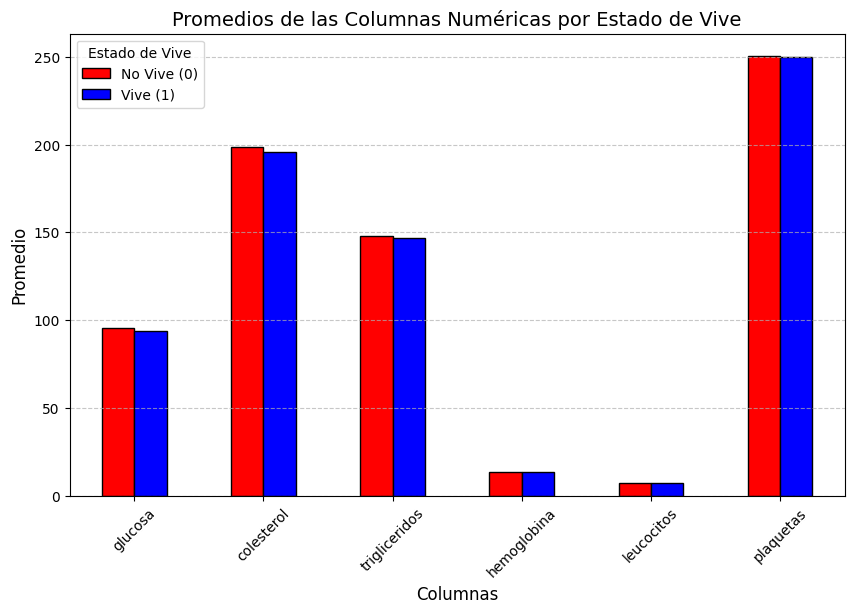

In [9]:
# Convertir las columnas numéricas a tipo float
columnas_numericas = ['glucosa', 'colesterol', 'trigliceridos', 'hemoglobina', 'leucocitos', 'plaquetas', ]
df[columnas_numericas] = df[columnas_numericas].replace(',', '.', regex=True).astype(float)

# Asegurarse de que la columna 'vive' sea numérica
df['vive'] = df['vive'].astype(int)

# Calcular los promedios por grupo (vive = 0 o 1)
promedios_vive = df.groupby('vive')[columnas_numericas].mean()

# Crear la gráfica
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']  # Rojo para vive=0, Azul para vive=1
promedios_vive.T.plot(kind='bar', color=colors, edgecolor='black', figsize=(10, 6))
plt.title('Promedios de las Columnas Numéricas por Estado de Vive', fontsize=14)
plt.ylabel('Promedio', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['No Vive (0)', 'Vive (1)'], title='Estado de Vive')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

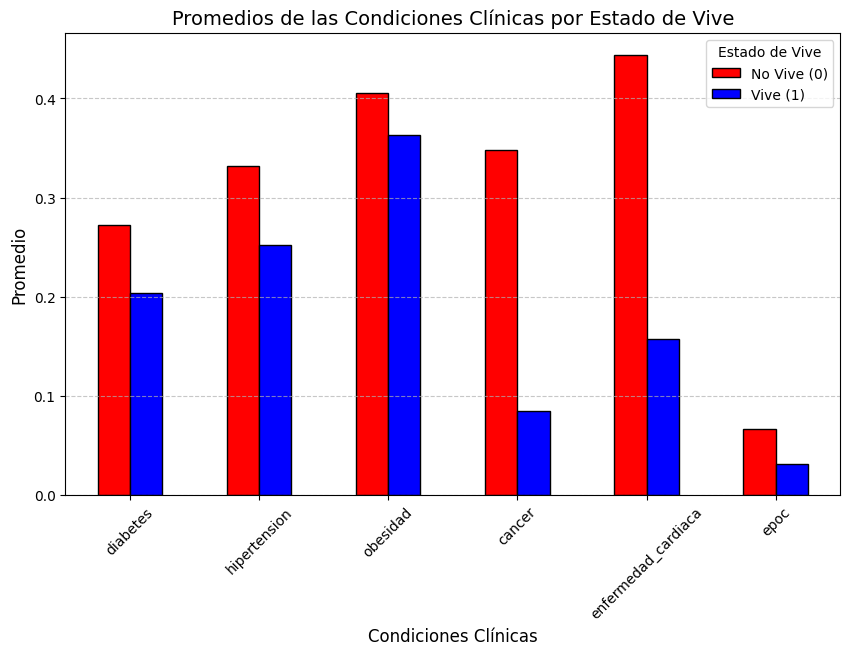

In [13]:
# Seleccionar las columnas binarias
columnas_binarias = ['diabetes', 'hipertension', 'obesidad', 'cancer', 'enfermedad_cardiaca', 'epoc']

# Calcular los promedios por grupo (vive = 0 o 1)
promedios_binarios = df.groupby('vive')[columnas_binarias].mean()

# Crear la gráfica
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']  # Rojo para vive=0, Azul para vive=1
promedios_binarios.T.plot(kind='bar', color=colors, edgecolor='black', figsize=(10, 6))
plt.title('Promedios de las Condiciones Clínicas por Estado de Vive', fontsize=14)
plt.ylabel('Promedio', fontsize=12)
plt.xlabel('Condiciones Clínicas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['No Vive (0)', 'Vive (1)'], title='Estado de Vive')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

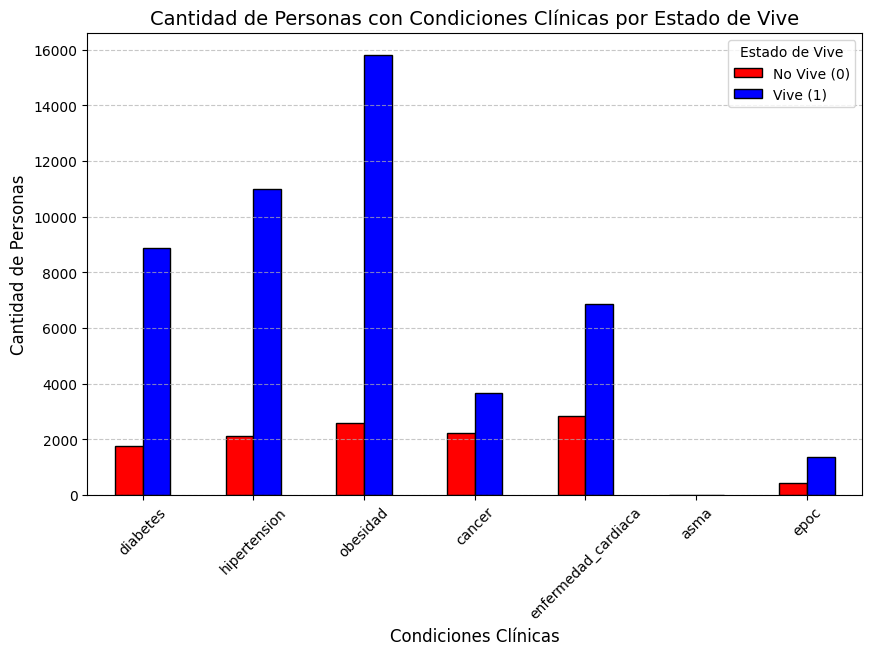

In [14]:
# Seleccionar las columnas binarias
columnas_binarias = ['diabetes', 'hipertension', 'obesidad', 'cancer', 'enfermedad_cardiaca', 'asma', 'epoc']

# Contar la cantidad de personas con cada condición por grupo (vive = 0 o 1)
conteo_binarios = df.groupby('vive')[columnas_binarias].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']  # Rojo para vive=0, Azul para vive=1
conteo_binarios.T.plot(kind='bar', color=colors, edgecolor='black', figsize=(10, 6))
plt.title('Cantidad de Personas con Condiciones Clínicas por Estado de Vive', fontsize=14)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xlabel('Condiciones Clínicas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['No Vive (0)', 'Vive (1)'], title='Estado de Vive')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Contar cuántas veces se repite cada valor en la columna 'vive'
conteo_vive = df['vive'].value_counts()

# Mostrar los resultados
print("Cantidad de pacientes que no viven (vive=0):", conteo_vive.get(0, 0))
print("Cantidad de pacientes que viven (vive=1):", conteo_vive.get(1, 0))

Cantidad de pacientes que no viven (vive=0): 6416
Cantidad de pacientes que viven (vive=1): 43584


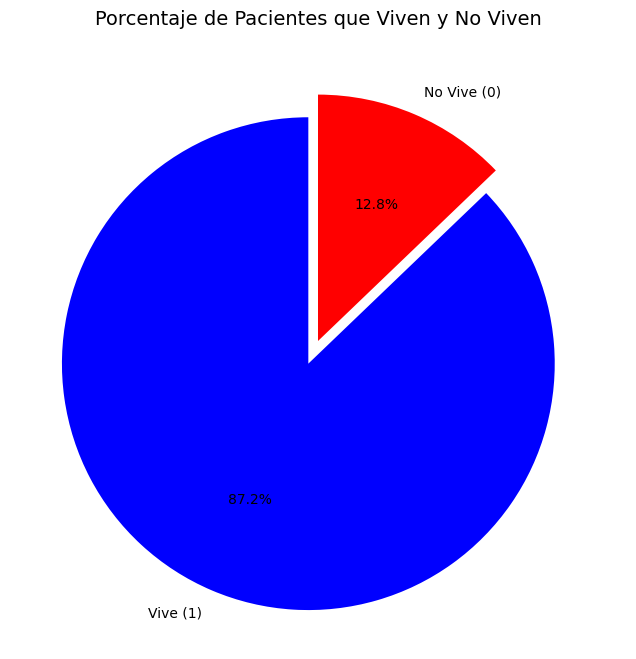

In [17]:
# Calcular los porcentajes de vive (0 y 1)
porcentajes_vive = df['vive'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    porcentajes_vive, 
    labels=['Vive (1)', 'No Vive (0)'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['blue', 'red'], 
    explode=(0.1, 0)  # Resaltar la porción de "No Vive"
)
plt.title('Porcentaje de Pacientes que Viven y No Viven', fontsize=14)
plt.show()